In [135]:
import numpy as np
import pandas as pd
import re
import os
import glob
from ast import literal_eval
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors

In [136]:
# the name of our directory
dname = os.path.dirname(os.getcwd()) + "/data_loading/data_v2_quotes/"
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts/data_loading/data_v2_quotes/'

In [137]:
# load the data
df = pd.read_csv(dname + "full_data.csv")
# drop redundant columns
df.drop(columns=["trial_bonus", "block_bonus", "resp_timestamp", "resp_reactiontime"], inplace=True)
df.drop(columns=["resp_correct_array", 
                "resp_correct_array_unshuf", 
                "prop_responses", 
                "groundTruthCorrect", 
                "groundTruthCorrect_unshuf",
                "resp_indices_values"], 
                inplace=True)
df.head(3)

,Unnamed: 0,id,expt_index,expt_trial,expt_block,trial_att,vbxi_category,exemplar,trialProperties,trialPropShuff,property_order,resp_indices
0,0,0,0,0,0,1,7,10,"[1, 0, 1, 0, 0, 0, 1]","[[0, 1, 0, 0, 1, 0, 1], [0, 0, 0, 1, 1, 1, 0]]","[[1, 0, 5, 4, 2, 3, 6], [5, 3, 4, 2, 0, 6, 1]]","[[0, 2, 1], [4, 3, 5]]"
1,1,0,1,1,0,0,7,0,"[1, 0, 1, 0, 0, 0, 1]","[[1, 1, 1, 0, 0, 0, 0]]","[[0, 6, 2, 3, 1, 5, 4]]","[[0, 1, 2]]"
2,2,0,2,2,0,1,3,1,"[1, 1, 0, 0, 1, 0, 0]","[[1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 0, 0, 0, 0]]","[[4, 2, 5, 3, 1, 6, 0], [0, 4, 1, 2, 5, 3, 6]]","[[2, 4, 3], [1, 2, 0]]"


In [138]:
# find the subjects
sujs = df['id'].unique()
# select all rows from first block
df_block0 = df.loc[df['expt_block'] == 0] # df.loc[:, df.loc['expt_block'] == 0]
df_block0.head(3)

,Unnamed: 0,id,expt_index,expt_trial,expt_block,trial_att,vbxi_category,exemplar,trialProperties,trialPropShuff,property_order,resp_indices
0,0,0,0,0,0,1,7,10,"[1, 0, 1, 0, 0, 0, 1]","[[0, 1, 0, 0, 1, 0, 1], [0, 0, 0, 1, 1, 1, 0]]","[[1, 0, 5, 4, 2, 3, 6], [5, 3, 4, 2, 0, 6, 1]]","[[0, 2, 1], [4, 3, 5]]"
1,1,0,1,1,0,0,7,0,"[1, 0, 1, 0, 0, 0, 1]","[[1, 1, 1, 0, 0, 0, 0]]","[[0, 6, 2, 3, 1, 5, 4]]","[[0, 1, 2]]"
2,2,0,2,2,0,1,3,1,"[1, 1, 0, 0, 1, 0, 0]","[[1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 0, 0, 0, 0]]","[[4, 2, 5, 3, 1, 6, 0], [0, 4, 1, 2, 5, 3, 6]]","[[2, 4, 3], [1, 2, 0]]"


In [139]:
# lets make a new column in our df with the order of selection for each hierachical level
# first we tranform the string in resp_indices to an array and select trials from the first selection 
df["hierachy_selection_order"] = df["resp_indices"].apply(lambda x: np.asarray(literal_eval(x)[0]))
df["property_order"] = df["property_order"].apply(lambda x: np.asarray(literal_eval(x)[0]))
df.head(5)

,Unnamed: 0,id,expt_index,expt_trial,expt_block,trial_att,vbxi_category,exemplar,trialProperties,trialPropShuff,property_order,resp_indices,hierachy_selection_order
0,0,0,0,0,0,1,7,10,"[1, 0, 1, 0, 0, 0, 1]","[[0, 1, 0, 0, 1, 0, 1], [0, 0, 0, 1, 1, 1, 0]]","[1, 0, 5, 4, 2, 3, 6]","[[0, 2, 1], [4, 3, 5]]","[0, 2, 1]"
1,1,0,1,1,0,0,7,0,"[1, 0, 1, 0, 0, 0, 1]","[[1, 1, 1, 0, 0, 0, 0]]","[0, 6, 2, 3, 1, 5, 4]","[[0, 1, 2]]","[0, 1, 2]"
2,2,0,2,2,0,1,3,1,"[1, 1, 0, 0, 1, 0, 0]","[[1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 0, 0, 0, 0]]","[4, 2, 5, 3, 1, 6, 0]","[[2, 4, 3], [1, 2, 0]]","[2, 4, 3]"
3,3,0,3,3,0,1,1,1,"[1, 1, 0, 1, 0, 0, 0]","[[1, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0]]","[0, 1, 3, 4, 6, 5, 2]","[[5, 2, 3], [1, 3, 4]]","[5, 2, 3]"
4,4,0,4,4,0,1,4,10,"[1, 0, 1, 0, 0, 1, 0]","[[0, 0, 0, 1, 0, 1, 1], [1, 1, 0, 0, 0, 0, 1]]","[3, 4, 6, 5, 1, 2, 0]","[[0, 4, 1], [6, 1, 0]]","[0, 4, 1]"


In [140]:
# transform response indices to the selection order with respect to the shuffled trial properties 
df["hierachy_selection_order"] = df.apply(lambda x: np.take(x.property_order, x.hierachy_selection_order), axis=1)
df.head(5)

,Unnamed: 0,id,expt_index,expt_trial,expt_block,trial_att,vbxi_category,exemplar,trialProperties,trialPropShuff,property_order,resp_indices,hierachy_selection_order
0,0,0,0,0,0,1,7,10,"[1, 0, 1, 0, 0, 0, 1]","[[0, 1, 0, 0, 1, 0, 1], [0, 0, 0, 1, 1, 1, 0]]","[1, 0, 5, 4, 2, 3, 6]","[[0, 2, 1], [4, 3, 5]]","[1, 5, 0]"
1,1,0,1,1,0,0,7,0,"[1, 0, 1, 0, 0, 0, 1]","[[1, 1, 1, 0, 0, 0, 0]]","[0, 6, 2, 3, 1, 5, 4]","[[0, 1, 2]]","[0, 6, 2]"
2,2,0,2,2,0,1,3,1,"[1, 1, 0, 0, 1, 0, 0]","[[1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 0, 0, 0, 0]]","[4, 2, 5, 3, 1, 6, 0]","[[2, 4, 3], [1, 2, 0]]","[5, 1, 3]"
3,3,0,3,3,0,1,1,1,"[1, 1, 0, 1, 0, 0, 0]","[[1, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0]]","[0, 1, 3, 4, 6, 5, 2]","[[5, 2, 3], [1, 3, 4]]","[5, 3, 4]"
4,4,0,4,4,0,1,4,10,"[1, 0, 1, 0, 0, 1, 0]","[[0, 0, 0, 1, 0, 1, 1], [1, 1, 0, 0, 0, 0, 1]]","[3, 4, 6, 5, 1, 2, 0]","[[0, 4, 1], [6, 1, 0]]","[3, 1, 4]"


In [141]:
# transform this into our coding corresponding to the three levels of the hierachy
# get the properties
props = np.arange(df.property_order[0].size)
# this could look much nicer indeed
df["hierachy_selection_order"] = df["hierachy_selection_order"].apply(lambda x: np.select([x == props[0]],[0], x))
df["hierachy_selection_order"] = df["hierachy_selection_order"].apply(lambda x: np.select([x == props[1], x == props[2]],
                                                                                          [1,1], 
                                                                                          x))

df["hierachy_selection_order"] = df["hierachy_selection_order"].apply(lambda x: np.select([x == props[3], 
                                                                                           x == props[4],
                                                                                           x == props[5],
                                                                                           x == props[6]],
                                                                                           [2, 2, 2, 2], 
                                                                                           x))                                                                                        
df.head(8)

,Unnamed: 0,id,expt_index,expt_trial,expt_block,trial_att,vbxi_category,exemplar,trialProperties,trialPropShuff,property_order,resp_indices,hierachy_selection_order
0,0,0,0,0,0,1,7,10,"[1, 0, 1, 0, 0, 0, 1]","[[0, 1, 0, 0, 1, 0, 1], [0, 0, 0, 1, 1, 1, 0]]","[1, 0, 5, 4, 2, 3, 6]","[[0, 2, 1], [4, 3, 5]]","[1, 2, 0]"
1,1,0,1,1,0,0,7,0,"[1, 0, 1, 0, 0, 0, 1]","[[1, 1, 1, 0, 0, 0, 0]]","[0, 6, 2, 3, 1, 5, 4]","[[0, 1, 2]]","[0, 2, 1]"
2,2,0,2,2,0,1,3,1,"[1, 1, 0, 0, 1, 0, 0]","[[1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 0, 0, 0, 0]]","[4, 2, 5, 3, 1, 6, 0]","[[2, 4, 3], [1, 2, 0]]","[2, 1, 2]"
3,3,0,3,3,0,1,1,1,"[1, 1, 0, 1, 0, 0, 0]","[[1, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0]]","[0, 1, 3, 4, 6, 5, 2]","[[5, 2, 3], [1, 3, 4]]","[2, 2, 2]"
4,4,0,4,4,0,1,4,10,"[1, 0, 1, 0, 0, 1, 0]","[[0, 0, 0, 1, 0, 1, 1], [1, 1, 0, 0, 0, 0, 1]]","[3, 4, 6, 5, 1, 2, 0]","[[0, 4, 1], [6, 1, 0]]","[2, 1, 2]"
5,5,0,5,5,0,1,1,9,"[1, 1, 0, 1, 0, 0, 0]","[[0, 0, 1, 1, 0, 1, 0], [1, 1, 0, 0, 0, 1, 0]]","[6, 4, 0, 1, 2, 3, 5]","[[2, 4, 5], [1, 0, 5]]","[0, 1, 2]"
6,6,0,6,6,0,1,2,8,"[1, 1, 0, 0, 1, 0, 0]","[[0, 0, 0, 1, 0, 1, 1], [1, 1, 0, 0, 0, 1, 0]]","[6, 2, 3, 1, 5, 0, 4]","[[3, 4, 2], [0, 1, 5]]","[1, 2, 2]"
7,7,0,7,7,0,3,0,2,"[1, 1, 0, 1, 0, 0, 0]","[[1, 0, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 0, 1],...","[1, 5, 2, 3, 0, 4, 6]","[[4, 3, 2], [0, 1, 3], [5, 1, 6], [2, 1, 5]]","[0, 2, 1]"


In [142]:
# extract the frequencies per block
def frequency_matrix(df):
    """function to create the input output matrix"""
    
    # get lists of the blocks and categories
    blocks = df['expt_block'].unique()
    levels = np.unique(df['hierachy_selection_order'].iloc[0])
    clicks = len(levels)

    # create a 3D tensor to store the category specific order across blocks
    frequency_matrix = np.full((clicks, len(levels), len(blocks)), np.nan)

    for block in blocks:
        
        # select block specific part of dataframe
        df_block = df.loc[df['expt_block'] == block]
        
        for i in range(clicks):
            
            # place the result in our output
            array_click = df_block["hierachy_selection_order"].apply(lambda x: x[i])
            frequency_matrix[i,:,block] = np.bincount(array_click)/array_click.shape
    
    return frequency_matrix

frequency_matrix = frequency_matrix(df)
# np.save(dname + 'in_out_matrix.npy', in_out_matrix)
print(frequency_matrix[:,:,0])



[[0.27678571 0.29719388 0.42602041]
 [0.22321429 0.31760204 0.45918367]
 [0.18622449 0.30994898 0.50382653]]


In [144]:
print(frequency_matrix[0,:,0].shape)

(3,)


Now we try to plot

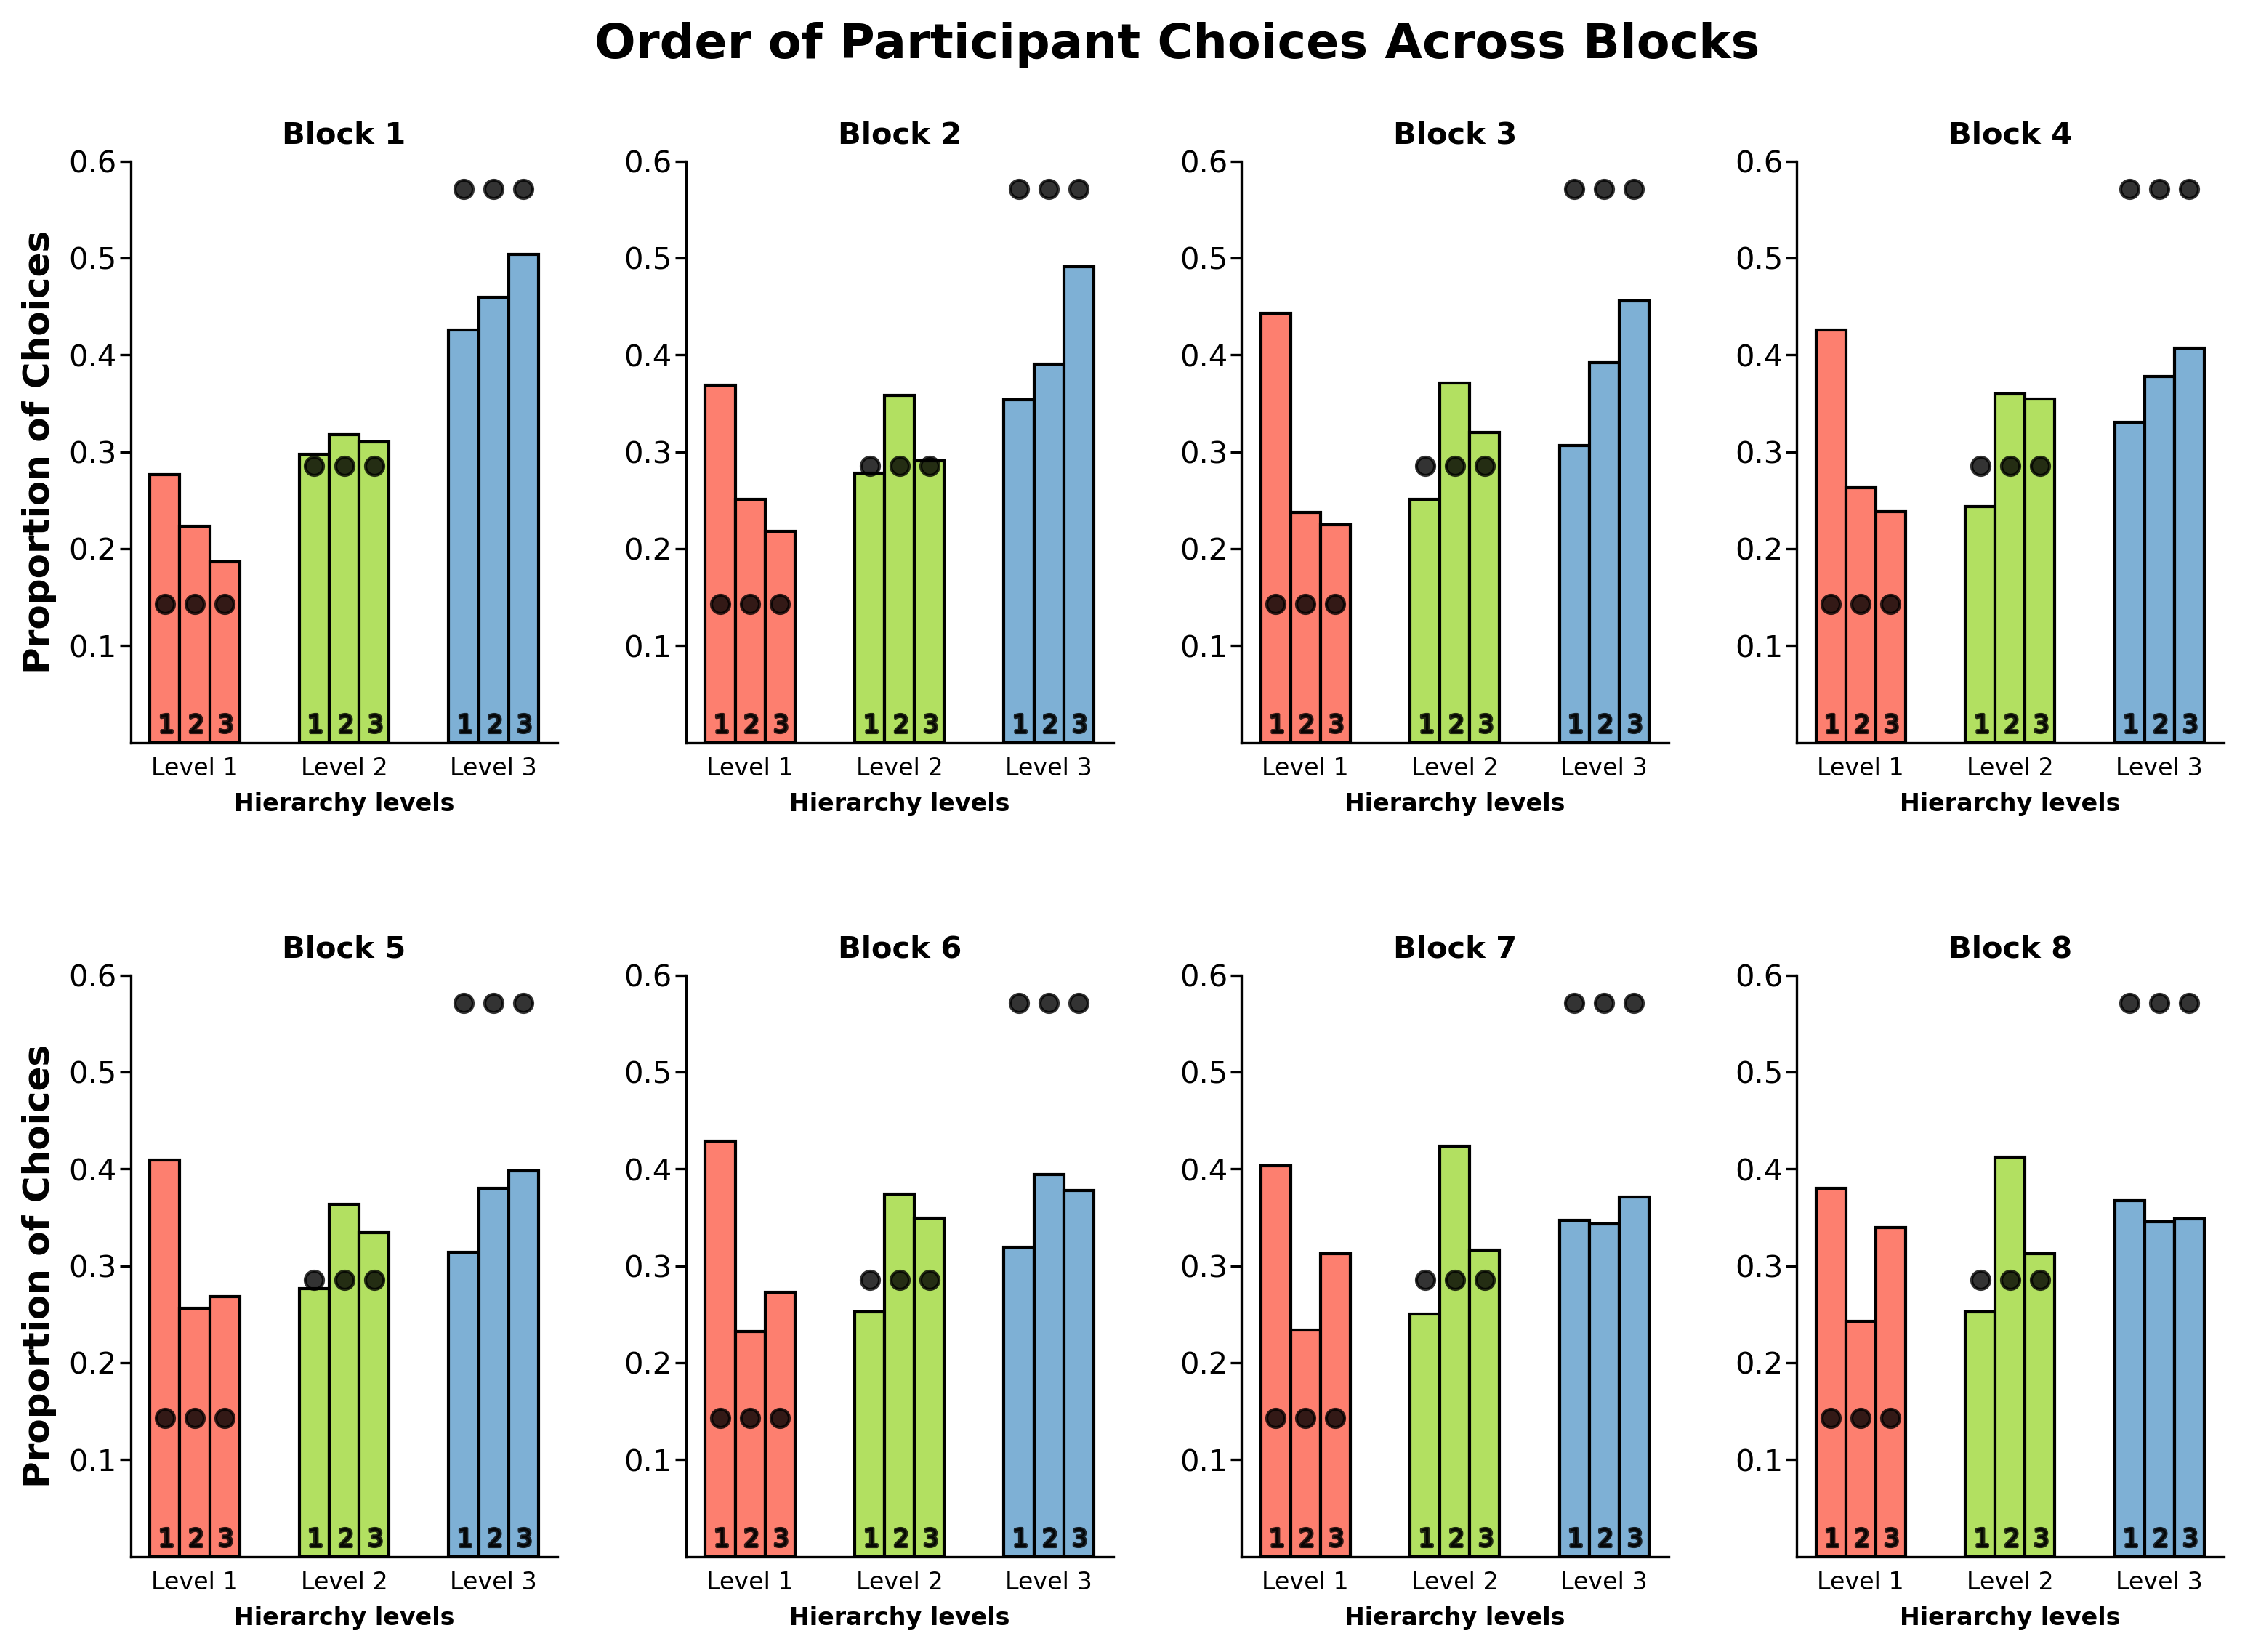

In [218]:
def plot_frequencies(frequency_matrix, fig_name, fig_title, unit_str, increment):
    # Define figure
    fig, axes = plt.subplots(2, 4, figsize=(12, 8), dpi=300, facecolor='w')
    chance_levels = np.array([1/7, 2/7, 4/7])
    clicks = frequency_matrix.shape[0]

    # set values for x axis
    x = np.asarray([1,2,3])
    x_labels = ["Level 1","Level 2", "Level 3"]

    # offset_list 
    offset =np.asarray([-.2, 0, .2])

    # make colour list
    colour_list = ['#fd7f6f', '#b2e061','#7eb0d5']

    # make a list of small numbers
    marker_list = ["1", "2", "3"]

    for i, ax in enumerate(axes.flatten()):
        # Hide the right and top spines
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        # remove ticks on bottom
        ax.tick_params(which='both', bottom=False, pad=1)
        # set yticks
        ax.set_yticks(np.arange(0.1,0.7,0.1))
        for click in range(clicks):

            # plot the selection
            ax.bar(x + offset[click], frequency_matrix[click,:,i], width=0.2, color=colour_list, align='center',edgecolor='k')
            
            # make the chance level
            ax.plot(x + offset[click], chance_levels, 
                    marker="o",
                    linestyle="", 
                    alpha=0.8, 
                    color="k")

            # make small numbers in bars
            ax.plot(x + offset[click], [0.02,0.02,0.02], 
                    marker=r"$ {} $".format(marker_list[click]),
                    linestyle="", 
                    alpha=0.8, 
                    color="k")
        if i % 4 == 0:
            # make the y axis label
            ax.set_ylabel("Proportion of Choices",fontweight='bold', fontsize = 12)
        
        # make x axis label
        ax.set_xlabel("Hierarchy levels",fontweight='bold', fontsize = 8)

    for i, ax in enumerate(axes.flatten()):
        
        ax.set_title(unit_str + " " + str(i* increment+1), fontsize = 10, fontweight='bold')
        ax.set_xticks(range(1, len(x_labels)+1))
        ax.set_xticklabels(x_labels, fontsize=8, rotation_mode="anchor")

    
    # add a supertitle
    fig.suptitle(fig_title, fontweight='bold', fontsize = 16)

    # set the spacing between subplots
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.3, 
                        hspace=0.4)
    
    fig.savefig(fig_name)

# print(os.getcwd())
plot_frequencies(frequency_matrix, 
                  'figures/selection_order.svg', 
                  "Order of Participant Choices Across Blocks",
                  "Block",
                  1
                )